## EasyVisa Project
***Marks: 60***

## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

### **Please read the instructions carefully before starting the project.** 
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. 
* Blanks '_______' are provided in the notebook that 
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space. 
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

## Importing necessary libraries

In [1]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Importing Dataset

In [2]:
# loading the data
visa = pd.read_csv('EasyVisa.csv')

In [3]:
# copying data to another variable to avoid any changes to original data
data = visa.copy()

## Overview of the Dataset

### View the first and last 5 rows of the dataset

In [4]:
# code to view top 5 rows of the data
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
# code to view last 5 rows of the data  
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


### Understand the shape of the dataset

In [6]:
# code to view dimensions of the data
data.shape

(25480, 12)

### Observation
There are 25,480 rows (observations) and 12 columns (attributes) in total.

### Check the data types of the columns for the dataset

In [7]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### Observation
All datatypes are accurately represented; there are 9 objects, 2 integers and 1 float in the dataset. The attributes we are analyzing and building a model around have 9 categorical variables and 3 numerical variables.

In [8]:
# checking for missing values in the data
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

### Observation
There are no missing values in the data.

In [9]:
# checking for duplicate entries in the data
data.duplicated().sum()

0

### Observation
There are no duplicate values in the data.

## Exploratory Data Analysis

#### Checking the statistical summary of the data

In [10]:
# printing the statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


### Observation
Number of employees appears to have a negative minimum value, which shows that the data has some inaccuracies.

The average number of employees is 5,667, while the Median value is 2,109 and maximum is 602,069.

The average year of establishment is 1979, while the most recurring (median) year (value) is 1997.

Prevailing wage has a minimum value of 2 dollars, an mean of 74,455 dollars, a median of 70,308 dollars and a maximum value of 319,210 dollars.

#### Fixing the negative values in number of employees columns

In [11]:
# code to check negative values in the employee column
data.loc[data['no_of_employees'] < 0].shape

(33, 12)

### Observation
There are 33 rows in the data set where the number of employees is less than 0.

In [12]:
# taking the absolute values for number of employees
data["no_of_employees"] = np.abs(data["no_of_employees"])

In [13]:
# checking for negative values in the employee column
data.loc[data['no_of_employees'] < 0, 'no_of_employees'].shape

(0,)

In [14]:
data.loc[data['no_of_employees'] < 0].shape

(0, 12)

### Observation
We converted the negative values into positive values.

#### Checking the count of each unique category in each of the categorical variables

In [15]:
# making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

### Observation
We checked for unique values in the dataset and found that:

Continent has 6 unique values; Africa, Asia, North America, Oceania (Australia) and South America.

Education of Employee has 4 unique values; Bachelor's, Master's, High School and Doctorate.

Has job experience, requires job training and full time position all have 2 unique values; Y (yes) or N (no).

Region of employment has 5 unique values; Northeast, South, West, Midwest, Island.

Unit of wage has 4 unique values; Year, Hour, Week and Month.

Case Status has 2 unique values; Certified or Denied.

In [16]:
# checking the number of unique values in case_id
data["case_id"].nunique()

25480

In [17]:
# dropping 'case_id' column from the data
data.drop(["case_id"], axis=1, inplace=True)

In [18]:
# viewing top 5 rows of the data after dropping case_id
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [19]:
# checking data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


### Observation
The case ID column is not particularly useful in drawing insights and conclusions from the data so we dropped the column from the dataset. There are now 8 categorical variables and 3 numerical variables in the data.

### Univariate Analysis

In [20]:
# function to plot a boxplot and a histogram

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on number of employees

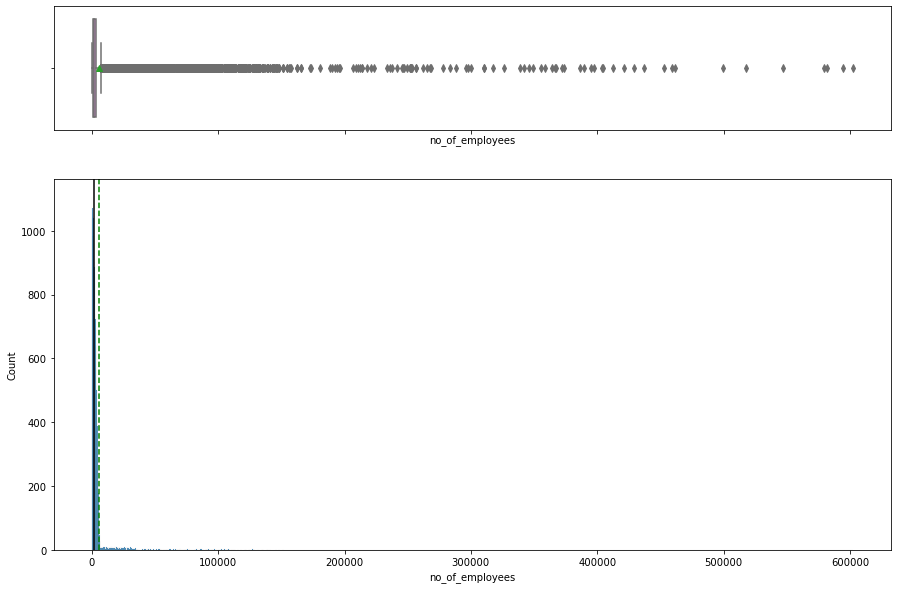

In [21]:
# code to create histogram and boxplot for no of employees
histogram_boxplot(data, "no_of_employees")

### Observations
The histogram confirms what was highlighted in the statistical summary. The average number of employees in the employer's company is just above 5,500 with a maximum value of just over 600,000 employees. There are numerous outliers in the data.

#### Observations on prevailing wage

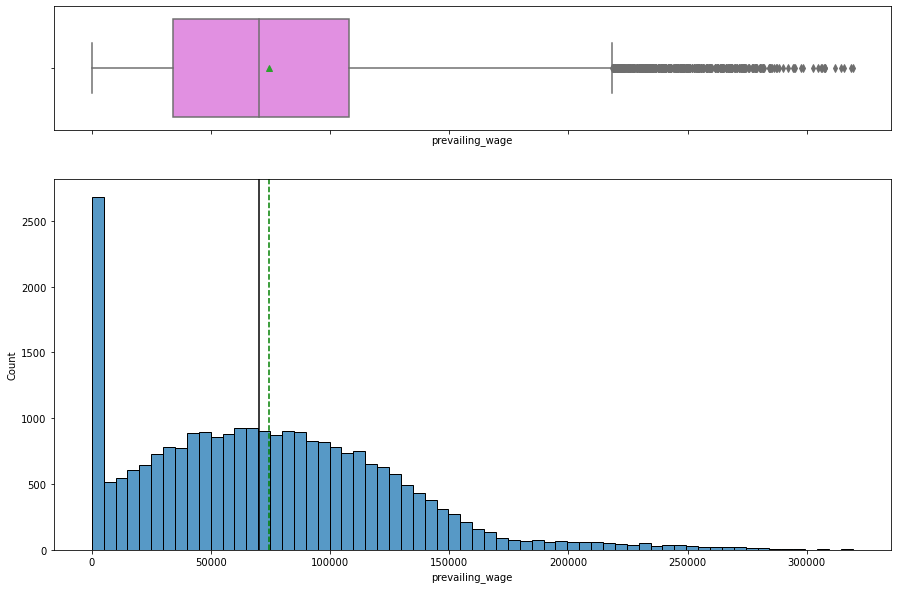

In [22]:
# code to create histogram_boxplot for prevailing wage
histogram_boxplot(data,'prevailing_wage')

### Observations
The distribution of prevailing wages is right-skewed. The plot shows that the mean and median values are both within the range of 70,000 - 80,000 dollars. We also checked prevailing wage for observations with values less than 100 dollars and found that all prevailing wages below 100 dollars are in hourly units. This means that similarly employed workers who earned less than 100 dollars, in their area of intended employment, did so at an hourly rate.

In [23]:
# code to find the rows with less than 100 prevailing wage
data.loc[data['prevailing_wage'] < 100, 'prevailing_wage']

338      15.7716
634       3.3188
839      61.1329
876      82.0029
995      47.4872
          ...   
25023    94.1546
25258    79.1099
25308    42.7705
25329    32.9286
25461    54.9196
Name: prevailing_wage, Length: 176, dtype: float64

In [24]:
# code to filter the data and get the count of the values in the 'unit_of_wage' column in the filtered data
data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts()

Hour    176
Name: unit_of_wage, dtype: int64

### Observations
We checked prevailing wage for observations with less values of less than 100 dollars and found that all prevailing wages below 100 dollars are in hourly units. This simply means that similarly employed workers who earned less than 100 dollars, in their area of intended employment, did so at an hourly rate.

In [25]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on continent

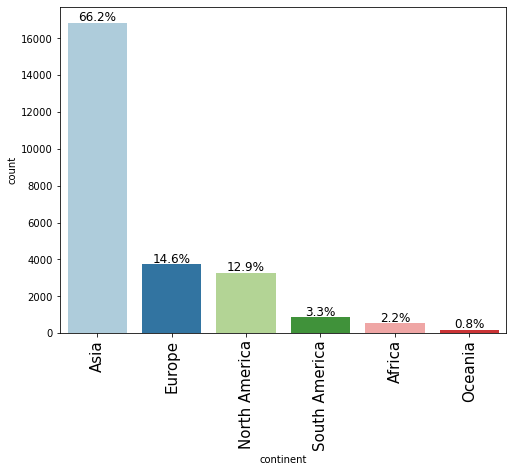

In [26]:
# code to create labeled_barplot for 'continent'
labeled_barplot(data, "continent", perc=True) 

### Observations
Asia has by far the highest percentage of applicants (66.2%) of any other continent in the data, followed by Europe (14.6%) and North America (12.9%).

#### Observations on education of employee

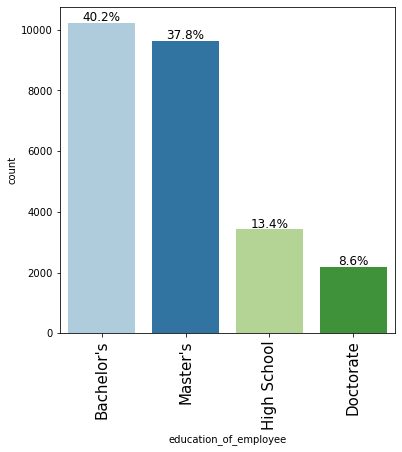

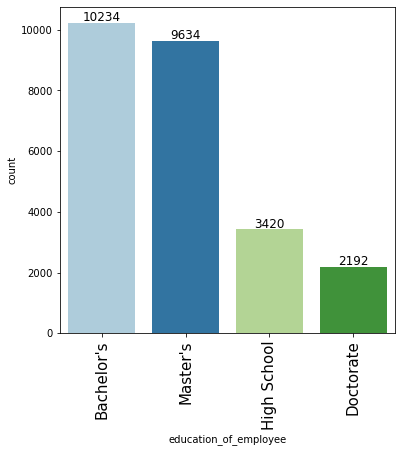

In [27]:
# code to create labeled_barplot for education of employee with and without percentages
labeled_barplot(data,'education_of_employee', perc=True)
labeled_barplot(data,'education_of_employee')

### Observation
40.2% (10,234) of applicants hold a Bachelor's as their highest level of education, while 37.8% (9,634) hold a Master's. Doctorate earners make up 8.6% (2,192) of the applicants in the data and the remaining 13.4% (3,420) are applicants with high school level education only.

#### Observations on job experience

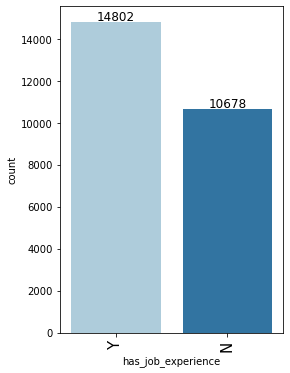

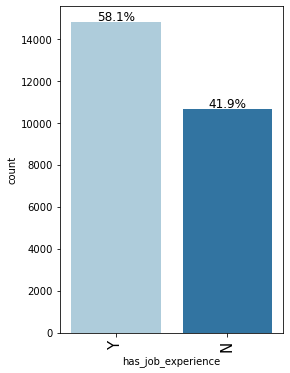

In [28]:
# creating labeled_barplot for job experience
labeled_barplot(data,'has_job_experience')
labeled_barplot(data,'has_job_experience', perc=True)

### Observation
There are more applicants with job experience than without. 58.1% (14,802) of applicants answered yes to having job experience while 41.9% (10,678) answered no.

#### Observations on job training

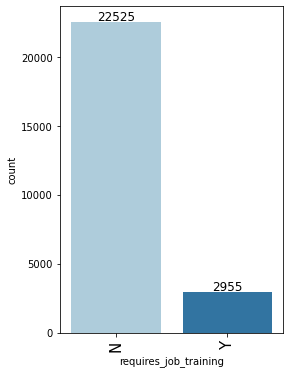

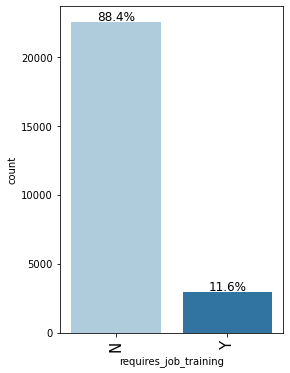

In [29]:
# creating labeled_barplot for job training 
labeled_barplot(data,'requires_job_training')
labeled_barplot(data,'requires_job_training', perc=True)

### Observation
88.4% (22,525) applicants will not require job training, while 11.6% (2,955) will need to be trained.

#### Observations on region of employment

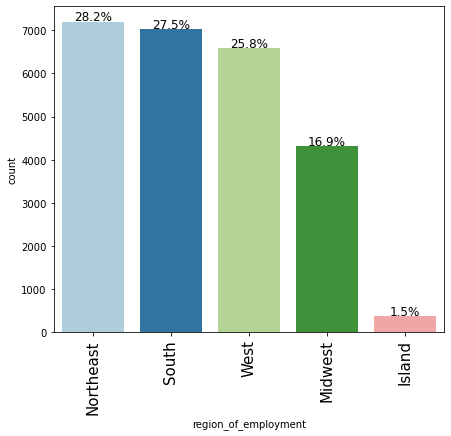

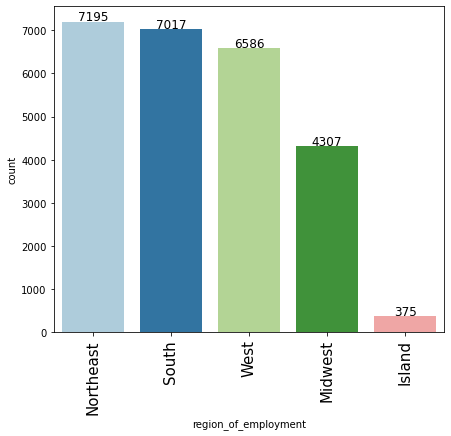

In [30]:
# creating labeled_barplot for region of employment
labeled_barplot(data,'region_of_employment', perc=True)
labeled_barplot(data,'region_of_employment') 

### Observation
The highest region of employment for applicants in the data are Northeast, South and West. The mentioned regions collectively make up 81.5% of applicants.

#### Observations on unit of wage

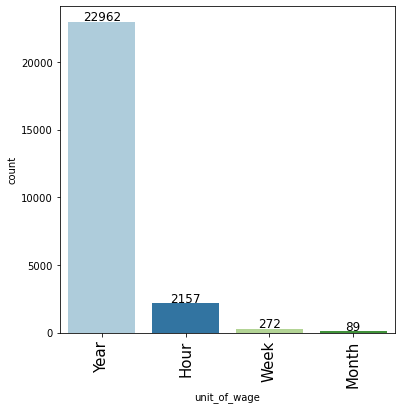

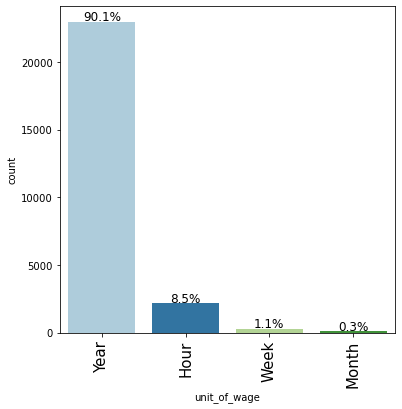

In [31]:
# creating labeled_barplot for unit of wage
labeled_barplot(data,'unit_of_wage')
labeled_barplot(data,'unit_of_wage', perc=True)

### Observation
Most employees in a similar area of intended employment earn in yearly units. 90.1% of employees received work compensation yearly, 8.5% were compensated hourly, 1.1% were compensated weekly, and 0.3% were compensated monthly.

#### Observations on case status

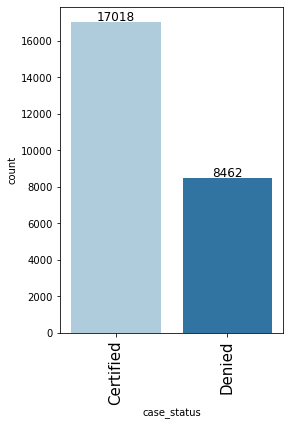

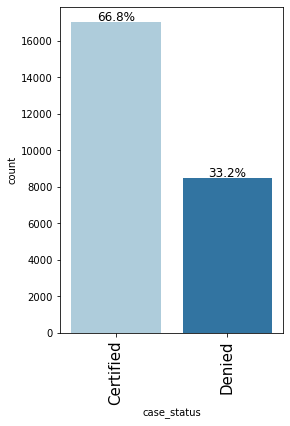

In [32]:
# creating labeled_barplot for case status
labeled_barplot(data,'case_status')
labeled_barplot(data,'case_status', perc=True)

### Observation
Most applicants were certified. 66.8%, approximately 2/3 of the applicants in the data, were certified, while the remaining 33.2% were denied.

### Bivariate Analysis

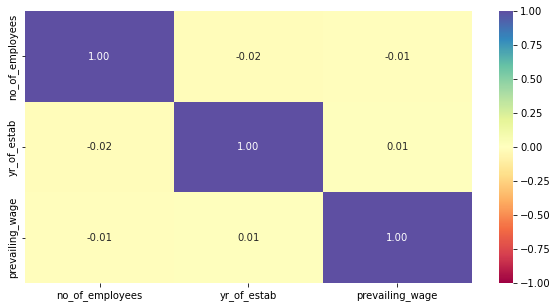

In [33]:
# code to find the correlation between the variables
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

### Observation
We plotted a heatmap and found no correlation between the numerical attributes in the data.

**Creating functions that will help us with further analysis.**

In [34]:
# function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [35]:
# defining a function to print category counts and plot a stacked bar chart for a given predictor and target variable

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. We want to know if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


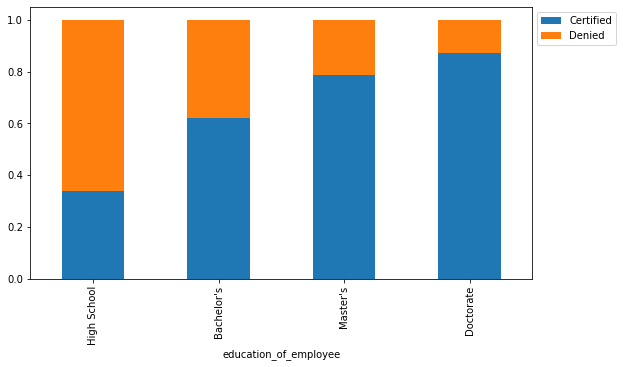

In [36]:
# code to plot a stacked barplot for 'education_of_employee' and 'case_status'
stacked_barplot(data, "education_of_employee", "case_status")

### Observation
The bar plot shows that applicants with the highest levels of education are likely to have their applications certified than others. Doctorate holders have 80% more certified cases than denied cases, while high school level education holders had less than 40% certified cases. 60% - 80% of Bachelor's and Master's holders had their applications certified.

#### Different regions have different requirements of talent having diverse educational backgrounds. We can analyze further

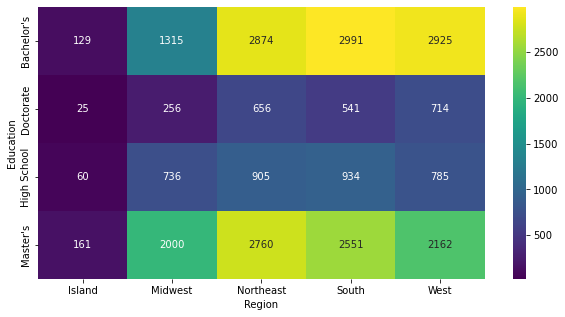

In [37]:
# creating a heatmap showing the cross-tabulation of education levels and employment regions in the dataset
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data["education_of_employee"], data["region_of_employment"]), annot=True, fmt="g", cmap="viridis")
plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

### Observation
The heatmap shows that the highest correlation exists between Bachelor's and Master's levels of education and the Northeast, South and West Regions. While these regions employ Doctorate and High School Cert holders, all three regions hired more Bachelor’s and Master’s holders than any other education level.

#### We'll analyze case status based on the different levels of education.

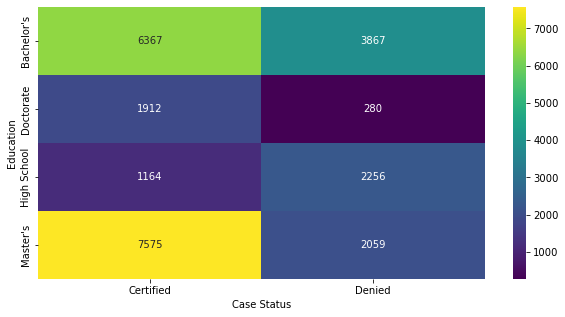

In [38]:
# creating a heatmap showing the cross-tabulation of education levels and case status
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data["education_of_employee"], data["case_status"]), annot=True, fmt="g", cmap="viridis")
plt.ylabel("Education")
plt.xlabel("Case Status")
plt.show()

### Observation
- Approximately, 87% (1,912) of Doctorate holders got certified.
- Approximately, 79% (7,575) of Master's holders got certified.
- Approximately, 62% (6,367) of Bachelor's holders got certified.
- Approximately, 34% (1,164) of High School certificate holders got certified.

#### A look at the percentage of visa certifications across each region

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


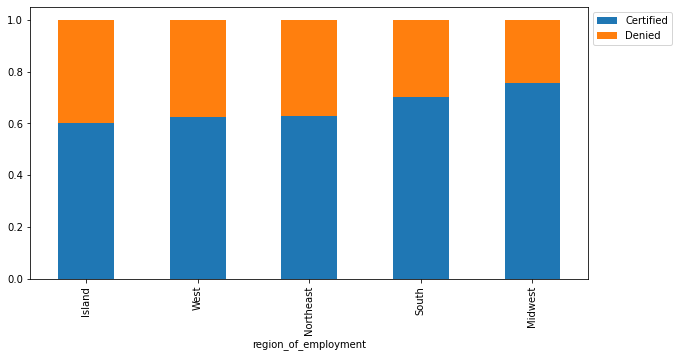

In [39]:
# plotting a stacked barplot for region of employment and case status
stacked_barplot(data, "region_of_employment", "case_status")

### Observation
All regions seem to have similar (somewhat uniform) rates of certification across all applicants (between 60%-80%), with the highest percentage of certifications being in the Midwest, followed by the South region. The South region has the highest count of certifications (4,913 applicants) and the Northeast has the highest count of denials (2,669 applicants).

#### Checking across different continents how visa status varies.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


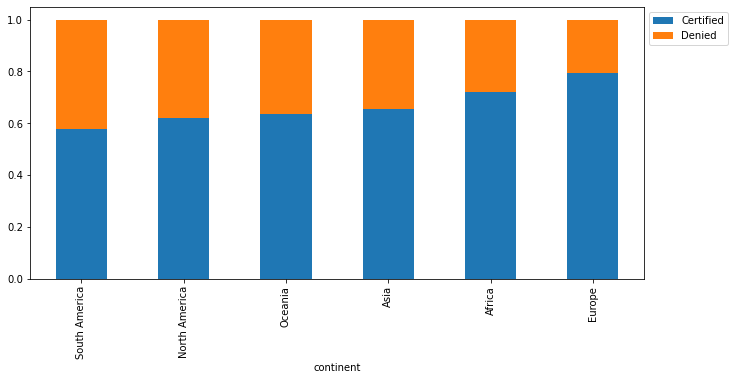

In [40]:
# plotting stacked barplot for continent and case status
stacked_barplot(data, "continent", "case_status")

### Observation
Europe has the highest percentage of certified applicants (at a count of 2,957), followed by the African continent (at a count of 397). Asia has a lower percentage of certified applicants than the two but also has the highest count of certifications (11,012 applicants) and denials (5,849 applicants) across all continents. This is due to very high numbers of applications from the Asian continent.

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. We want to know if having work experience has any influence over visa certification 

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


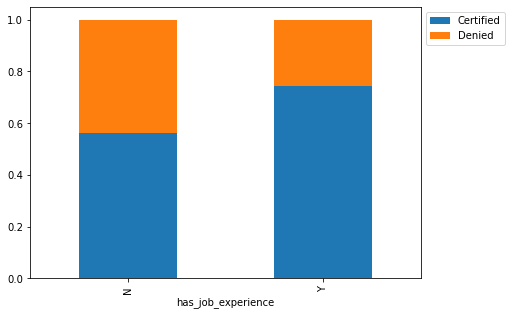

In [41]:
# plotting stacked barplot for job experience and case status
stacked_barplot(data, "has_job_experience", "case_status")

### Observation
Over 70% of applicants with job experience were certified, while under 60% of applicants without job experience were certified. The highest count of certifications were from applicants (11,024) with job experience and the highest count of denials were from applicants (4,684) without job experience.

#### Do the employees who have prior work experience require any job training?

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


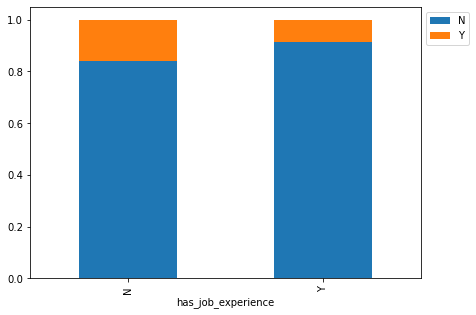

In [42]:
# plotting stacked barplot for job experience and requires_job_training
stacked_barplot(data, "has_job_experience", "requires_job_training")

### Observation
The data shows that most employees with prior job experience will not require any additional job training, while most employees without any prior job experience also tend to not require job training. However, the data shows that those employees without prior experience tend to require training more frequently than those with prior experience.

#### The US government has established a prevailing wage to protect local talent and foreign workers. We'll analyze the data and see if the visa status changes with the prevailing wage

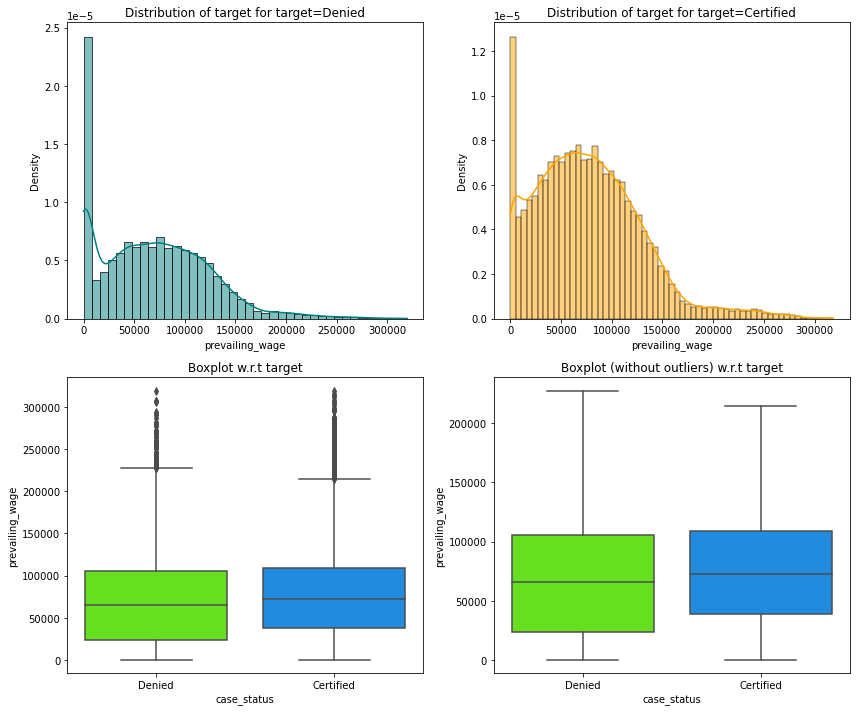

In [43]:
# code to find distribution of prevailing wage and case status
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

### Observation
The distribution of the combined attributes (prevailing wage and case status) are positively skewed, separately the distribution for both certified and denied profiles appear to be quite similar. The box plot shows the median prevailing wage for applicants, certified and denied, to be between 50,000 - 100,000 dollars respectively. The conclusion here is that the visa status is unaffected by (does not change significantly) the prevailing wage.

#### Checking if the prevailing wage is similar across all the regions of the US

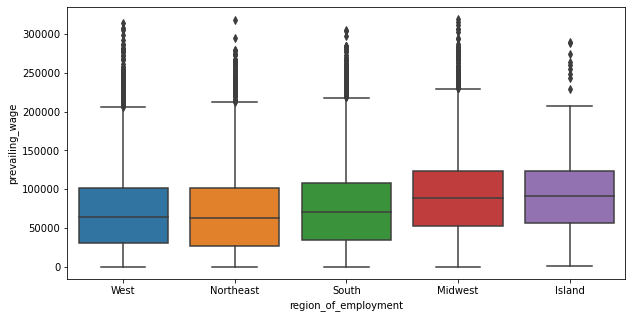

In [44]:
# creating boxplot for region of employment and prevailing wage
plt.figure(figsize=(10, 5))
sns.boxplot(data["region_of_employment"],data["prevailing_wage"])
plt.show()

### Observation
The prevailing wage appears to be similar across all regions in the US. Some have slightly higher and lower values than others but the differences are not so stark. For instance, Midwest and Island regions both have a higher median value of prevailing wages than the other three regions, yet all three regions have median values between 60,000 and 90,000. Island has a lowest maximum prevailing wage than other regions. All regions have numerous outliers in the data.

#### The prevailing wage has different units (Hourly, Weekly, etc). We want to know if this has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


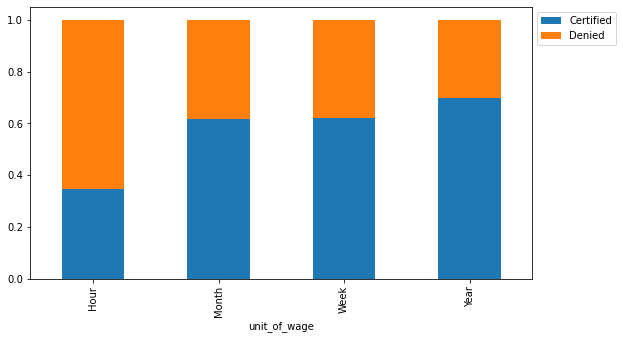

In [45]:
# plotting stacked barplot for unit of wage and case status
stacked_barplot(data, 'unit_of_wage', 'case_status')

### Observation
Employees who received yearly, monthly and weekly pay were certified at higher rates than hourly workers. Employees who are paid an annual salary have the highest certified (16,047) and denied (6,915) counts, this makes sense since the majority of candidates in the data are paid annually.

## Data Preprocessing

### Outlier Check

- Checking for outliers in the data.

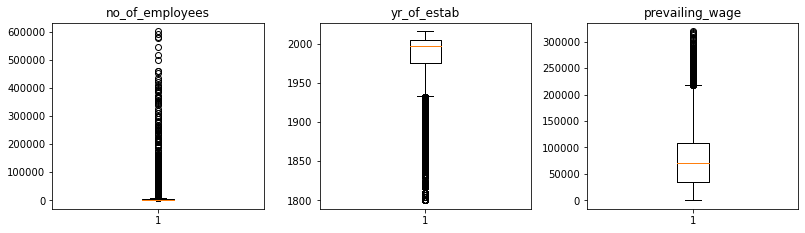

In [46]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

# creating boxplots for all the numeric columns
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

### Observation
There are a lot of outliers in the data. However, we will not treat them as they are proper values.

### Actions for data pre-processing:
We have already made necessary adjustments to observations and attributes in the data. For instance, dropped the case ID column and fixed the negative values in the "no_of_employees" column by converting them into positive values.

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [47]:
# converting the values in the 'case_status' to binary, where 'Certified' is represented as 1 and any other value is represented as 0
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

# dropping case status from the data
X = data.drop(["case_status"], axis=1)
y = data["case_status"]

# creating dummies for X 
X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets in the ratio 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [48]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


### Observation
We encoded categorical features and split the data into train and test. After these steps, there were 17,836 observations in the training set and 7,644 observations in the test set, and 21 attributes in both training and test sets.

## Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

### Which case is more important? 
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy. 



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.

**First, we'll create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [49]:
# defining a function to compute different metrics to check performance of a classification model

def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [50]:
# defining a function that takes a classifier model, predictors (independent variables), and target (dependent variable) as inputs
# plotting a confusion matrix with percentages using a heatmap

def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree Model

In [51]:
# defining decision tree classifier and fitting it on the train data 
model= DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### The Confusion Matrix

True Positives (TP): The visa should get certified and the model predicted that it will get certified.

True Negatives (TN): The visa should get denied and the model predicted that it will not get certified.


False Positives (FP): The visa should get denied and the model predicted that it will get certified.

False Negatives (FN): The visa should get certified and the model predicted that it will not get certified.

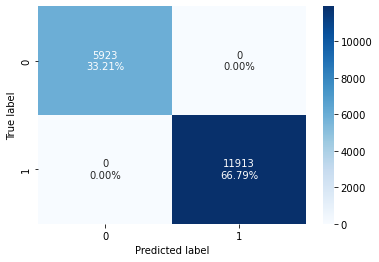

In [52]:
# creating confusion matrix for train data
confusion_matrix_sklearn(model, X_train, y_train)

#### Checking model performance on training set

In [53]:
# checking model performance on train data
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test set

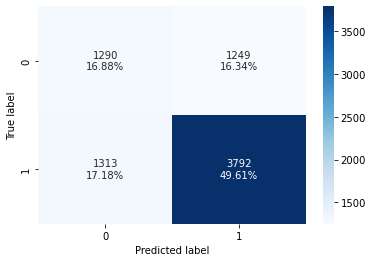

In [54]:
# creating confusion matrix for test data
confusion_matrix_sklearn(model, X_test, y_test)

In [55]:
# checking model performance on test data
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.664835,0.742801,0.752232,0.747487


### Observation
This model was able to perfectly classify all the data points on the training set. Decision trees, without restrictions, will continue to grow until all data points are correctly classified and the trees will learn all the patterns in the training set.
<p>The training set has performed excellently, while the test set has not performed well when both are compared. This model performance check shows us that there is overfitting in this model.</p>

### Hyperparameter Tuning - Decision Tree

In [56]:
# choosing the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# running the grid search with n_jobs = -1
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)

#fitting the grid_obj on the train data
grid_obj = grid_obj.fit(X_train, y_train)

# setting the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# fitting the best algorithm to the data
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

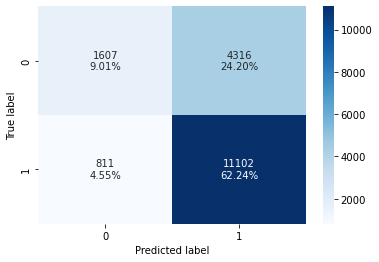

In [57]:
# creating confusion matrix for tuned estimator on train data
confusion_matrix_sklearn(dtree_estimator,X_train,y_train)

In [58]:
# checking performance for tuned estimator on train data
dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


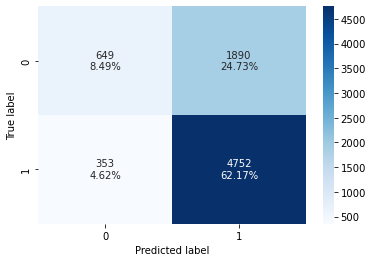

In [59]:
# creating confusion matrix for tuned estimator on test data
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

In [60]:
# checking model performance for tuned estimator on test data
dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


### Observation
This model has performed better than the unpruned decision tree, the overfitting of the previous model has been corrected in this model. The training and test set produced similar results. The test set produced an F1 score of 0.8091 and has not performed poorly but we still tested other models to get the best F1 score possible.

## Bagging - Model Building and Hyperparameter Tuning

### Bagging Classifier

In [61]:
# defining bagging classifier and fitting it on the train data
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

BaggingClassifier(random_state=1)

#### Checking model performance on training set

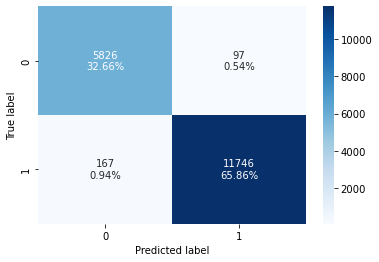

In [62]:
# creating confusion matrix for train data
confusion_matrix_sklearn(bagging_classifier,X_train,y_train)

In [63]:
# checking model performance on train data
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.985198,0.985982,0.99181,0.988887


#### Checking model performance on test set

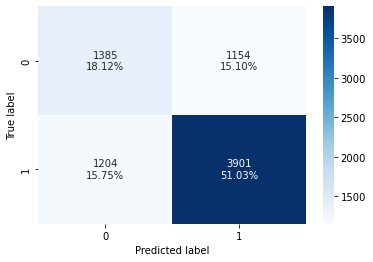

In [64]:
# creating confusion matrix for test data
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

In [65]:
# checking model performance on test data
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.691523,0.764153,0.771711,0.767913


### Hyperparameter Tuning - Bagging Classifier

In [66]:
# choosing the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# running the grid search with cv = 5
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)

# fitting the grid_obj on train data
grid_obj = grid_obj.fit(X_train, y_train)

# setting the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# fitting the best algorithm to the data
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

#### Checking model performance on training set

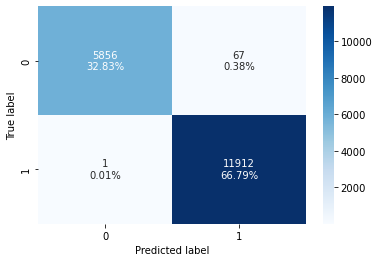

In [67]:
# creating confusion matrix for tuned estimator on train data
confusion_matrix_sklearn(bagging_estimator_tuned,X_train,y_train)

In [68]:
# checking model performance for tuned estimator on train data
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.996187,0.999916,0.994407,0.997154


#### Checking model performance on test set

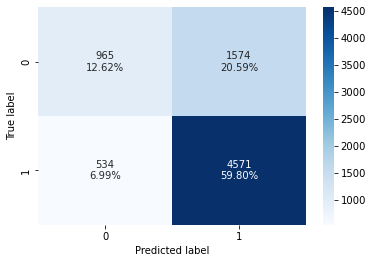

In [69]:
# creating confusion matrix for tuned estimator on test data
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

In [70]:
# checking model performance for tuned estimator on test data
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.724228,0.895397,0.743857,0.812622


### Observation
These models were able to almost perfectly classify all the data points on the training set but did not do as well on the test set. Based on our chosen metric (F1 score), our test sets performed better than the previous decision tree models we built, on both un-tuned (0.7679) models and tuned (0.8126) models, respectively. We tested more models to get the best F1 score possible.

### Random Forest

In [71]:
# defining random forest and fitting it on the train data
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

#### Checking model performance on training set

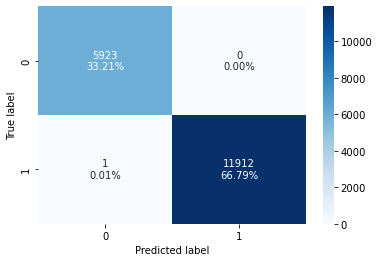

In [72]:
# creating confusion matrix for train data
confusion_matrix_sklearn(rf_estimator,X_train,y_train)

In [73]:
# checking model performance on train data
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator,X_train,y_train)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999944,0.999916,1.0,0.999958


#### Checking model performance on test set

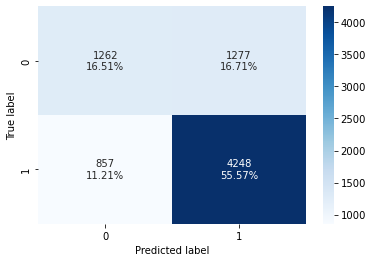

In [74]:
# creating confusion matrix for test data
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

In [75]:
# checking model performance on test data
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator,X_test,y_test)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.720827,0.832125,0.768869,0.799247


### Hyperparameter Tuning - Random Forest

In [76]:
# choosing the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# running the grid search with cv = 5 and n_jobs = -1
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)

# fitting the grid_obj on the train data
grid_obj = grid_obj.fit(X_train, y_train)

# setting the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# fitting the best algorithm to the data
rf_tuned.fit(X_train, y_train)

/Users/AnnabelleE/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/AnnabelleE/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/AnnabelleE/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/AnnabelleE/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/AnnabelleE/opt/anaconda3/lib/python3.9/site-packages/sklearn/

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=7,
                       n_estimators=20, oob_score=True, random_state=1)

#### Checking model performance on training set

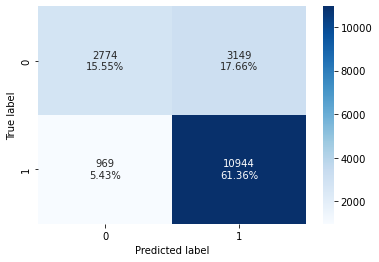

In [77]:
# creating confusion matrix for tuned estimator on train data
confusion_matrix_sklearn(rf_tuned,X_train,y_train)

In [78]:
# checking model performance for tuned estimator on train data
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned,X_train,y_train)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.769119,0.91866,0.776556,0.841652


#### Checking model performance on test set

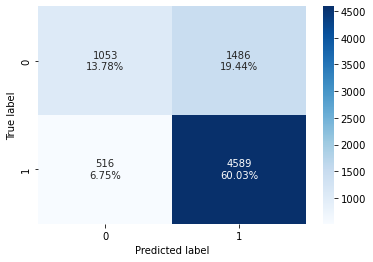

In [79]:
# creating confusion matrix for tuned estimator on test data
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

In [80]:
# checking model performance for tuned estimator on test data
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned,X_test,y_test)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.738095,0.898923,0.755391,0.82093


### Observation
Our un-tuned random forest models was able to capture most of the data in the training set in an attempt to classify all the data points. Our tuned random forest performed well on the test set and was able to produce an F1 score of 0.82093. This is the highest F1 score we have received so far from all models in the test set, so we continued testing more models to get the best F1 score possible.

## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [81]:
# defining AdaBoost Classifier and fitting it on the train data
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

#### Checking model performance on training set

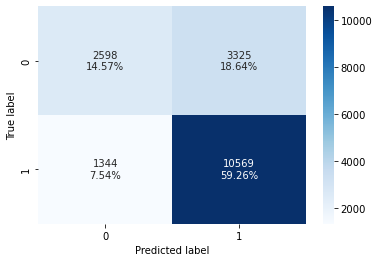

In [82]:
# creating confusion matrix for train data
confusion_matrix_sklearn(ab_classifier,X_train,y_train)

In [83]:
# checking model performance on train data
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier,X_train,y_train)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


#### Checking model performance on test set

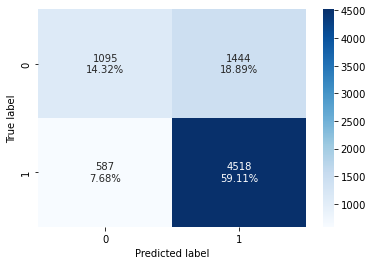

In [84]:
# creating confusion matrix for test data
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

In [85]:
# checking model performance on test data
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier,X_test,y_test)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


### Hyperparameter Tuning - AdaBoost Classifier

In [86]:
# choosing the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# grid of parameters to choose from
parameters = {
    # trying a different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# running the grid search with cv = 5
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)

# fitting the grid_obj on train data
grid_obj = grid_obj.fit(X_train, y_train)

# setting the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# fitting the best algorithm to the data
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

#### Checking model performance on training set

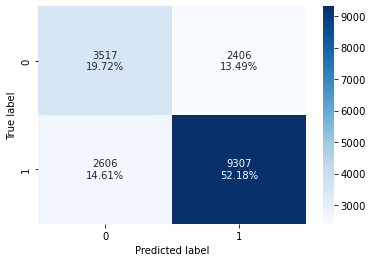

In [87]:
# creating confusion matrix for tuned estimator on train data
confusion_matrix_sklearn(abc_tuned,X_train,y_train)

In [88]:
# checking performance for tuned estimator on train data
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned,X_train,y_train)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.718995,0.781247,0.794587,0.787861


#### Checking model performance on test set

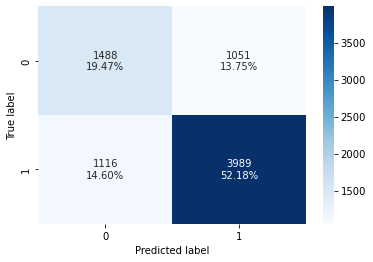

In [89]:
# creating confusion matrix for tuned estimator on test data
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

In [90]:
# checking model performance for tuned estimator on test data
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned,X_test,y_test)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.71651,0.781391,0.791468,0.786397


### Observation
These models were not able to classify all the data points on the training set as well as the previous models but there appears to be much less overfitting on the training data in comparison. Training and test sets have performed similarly, but compared to the results from our previous models not as well. Our un-tuned adaboost classifier model performed slightly worse than our tuned random forest so we did not choose this model, instead, we continued to test other models to get the best F1 score possible.

### Gradient Boosting Classifier

In [91]:
# defining Gradient Boosting Classifier and fitting it on the train data
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

#### Checking model performance on training set

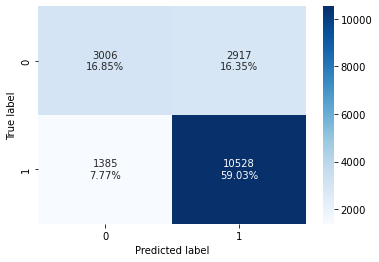

In [92]:
# creating confusion matrix for train data
confusion_matrix_sklearn(gb_classifier,X_train,y_train)

In [93]:
# checking model performance on train data
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier,X_train,y_train)
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


#### Checking model performance on test set

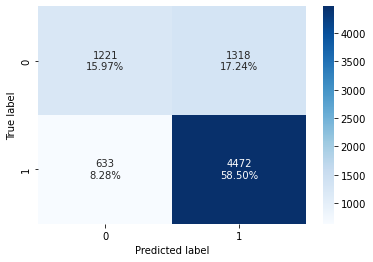

In [94]:
# creating confusion matrix for test data
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

In [95]:
# checking model performance on test data
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier,X_test,y_test)
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


### Hyperparameter Tuning - Gradient Boosting Classifier

In [96]:
# choosing the type of classifier
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# running the grid search cv = 5
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)

# fitting the grid_obj on train data
grid_obj = grid_obj.fit(X_train, y_train)

# setting the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# fitting the best algorithm to the data
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

#### Checking model performance on training set

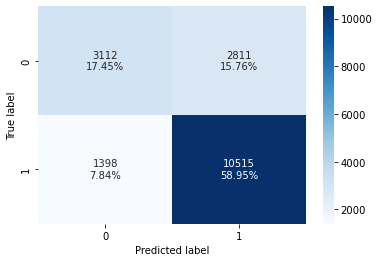

In [97]:
# creating confusion matrix for tuned estimator on train data
confusion_matrix_sklearn(gbc_tuned,X_train,y_train)

In [98]:
# checking model performance for tuned estimator on train data
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.764017,0.882649,0.789059,0.833234


#### Checking model performance on test set

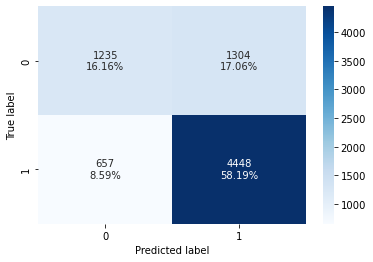

In [99]:
# creating confusion matrix for tuned estimator on test data
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

In [100]:
# checking model performance for tuned estimator on test data
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743459,0.871303,0.773296,0.819379


### Observation
Both models performed well on the test set. However, the untuned gradient boosting classifier performed better than the tuned gradient boosting classifier model on the test set. We received the same F1 score from our untuned gradient boosting classifier model and our tuned random forest. These test sets have performed well but we can still test other models to get the best F1 score possible.

### Note - You can choose **not to build** XGBoost if you have any installation issues

### XGBoost Classifier

In [101]:
# defining XGBoost Classifier and fitting it on the train data
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Checking model performance on training set

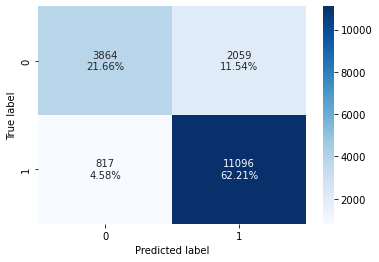

In [102]:
# creating confusion matrix for train data
confusion_matrix_sklearn(xgb_classifier,X_train,y_train)

In [103]:
# checking model performance on train data
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.838753,0.931419,0.843482,0.885272


#### Checking model performance on test set

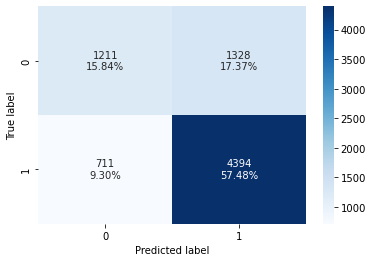

In [104]:
# creating confusion matrix for test data
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

In [105]:
# checking model performance on test data
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.733255,0.860725,0.767913,0.811675


### Hyperparameter Tuning - XGBoost Classifier

In [106]:
# choosing the type of classifier
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# runing the grid search with cv=5
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)

# fitting the grid_obj on train data
grid_obj = grid_obj.fit(X_train, y_train)

# setting the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# fitting the best algorithm to the data
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, eval_metric='logloss', gamma=5,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

#### Checking model performance on training set

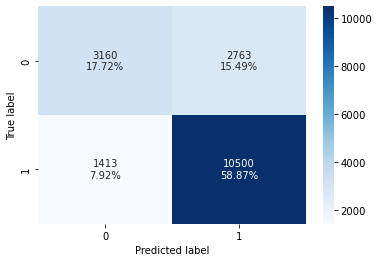

In [107]:
# creating confusion matrix for tuned estimator on train data
confusion_matrix_sklearn(xgb_tuned,X_train,y_train)

In [108]:
# checking model performance for tuned estimator on train data
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.765867,0.88139,0.791676,0.834128


#### Checking model performance on test set

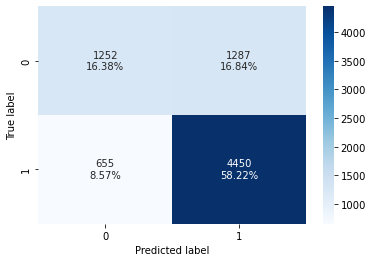

In [109]:
# creating confusion matrix for tuned estimator on test data
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

In [110]:
# checking model performance for tuned estimator on test data
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.745945,0.871694,0.775667,0.820882


### Observation
Both xgboost models did not perform as well as our previous models. While the test set of the tuned xgboost classifier model gave us an F1 score of 0.8209, it is still performing only marginally worse than our tuned random forest and untuned gradient boosting classifier. As a result, we did not select xgboost classifier and we tested one final classifier model to see if we can get our best F1 score yet.

## Stacking Classifier

In [111]:
# defining Stacking Classifier and fitting it on the train data
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=Tru...
                                                 

#### Checking model performance on training set

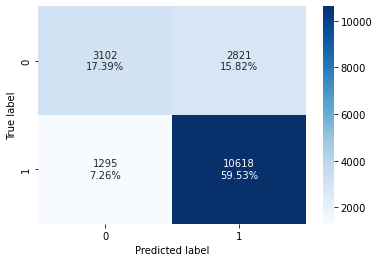

In [112]:
# creating confusion matrix for train data
confusion_matrix_sklearn(stacking_classifier,X_train,y_train)

In [113]:
# checking model performance on train data
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.769231,0.891295,0.790089,0.837646


#### Checking model performance on test set

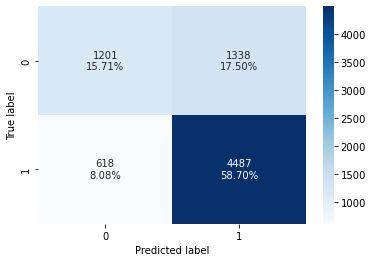

In [114]:
# creating confusion matrix for test data
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

In [115]:
# checking model performance on test data
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744113,0.878942,0.7703,0.821043


### Observation
This model has given us our best model performance so far, with an F1 score of 0.821043, on the test set. We know that the stacking classifier has produced the best result of all models based on our chosen metric. This means we have a 82.1% chance of minimizing false negatives and false positives during profile examinations by using this stacking classifier model.

## Model Performance Comparison and Final Model Selection

In [116]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.985198,0.996187,0.999944,0.769119,0.738226,0.718995,0.758802,0.764017,0.838753,0.765867,0.769231
Recall,1.0,0.931923,0.985982,0.999916,0.999916,0.918660,0.887182,0.781247,0.883740,0.882649,0.931419,0.881390,0.891295
Precision,1.0,0.720067,0.991810,0.994407,1.000000,0.776556,0.760688,0.794587,0.783042,0.789059,0.843482,0.791676,0.790089
F1,1.0,0.812411,0.988887,0.997154,0.999958,0.841652,0.819080,0.787861,0.830349,0.833234,0.885272,0.834128,0.837646


In [117]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664835,0.706567,0.691523,0.724228,0.720827,0.738095,0.734301,0.716510,0.744767,0.743459,0.733255,0.745945,0.744113
Recall,0.742801,0.930852,0.764153,0.895397,0.832125,0.898923,0.885015,0.781391,0.876004,0.871303,0.860725,0.871694,0.878942
Precision,0.752232,0.715447,0.771711,0.743857,0.768869,0.755391,0.757799,0.791468,0.772366,0.773296,0.767913,0.775667,0.770300
F1,0.747487,0.809058,0.767913,0.812622,0.799247,0.820930,0.816481,0.786397,0.820927,0.819379,0.811675,0.820882,0.821043


### Observation
Our chosen metric is the F1 score, so we chose the stacking classifier model, since it produced the highest F1 score on test set.

### Important features of the final model

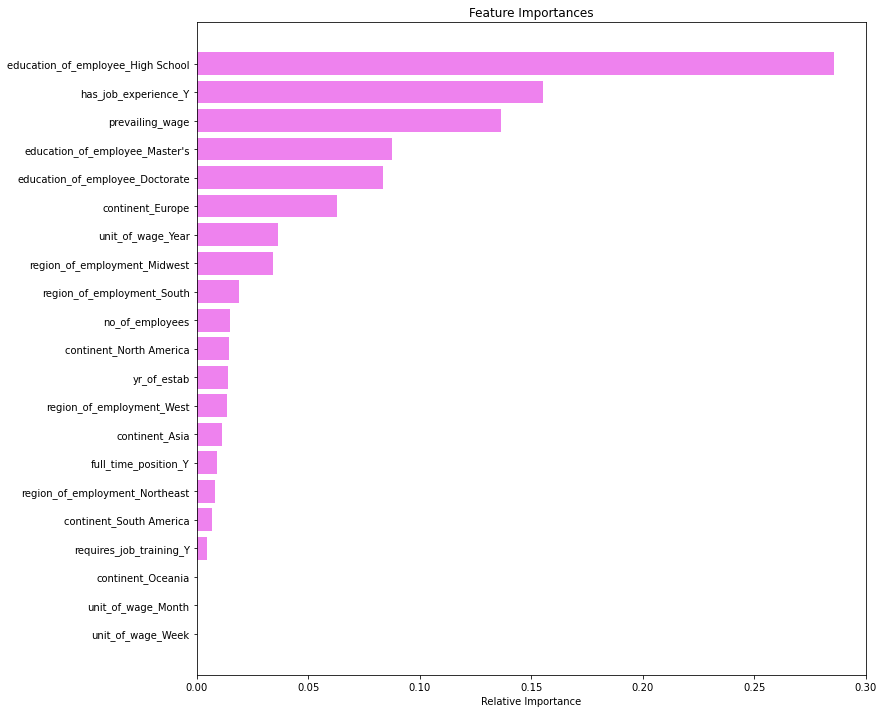

In [118]:
# calculating and plotting the feature importances of the gradient boosting classifier (gb_classifier)
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observation
The most important feature in our final model is the high school value in the education of employee column. The next most important feature is having job experience, followed by prevailing wage.

## Business Insights and Recommendations

### Conclusions
- We were able to collect helpful insights that influence the case status based on an applicant’s profile but there could also be factors in the application process that have previously affected case status due to factors on the employer’s side.
- The data shows that the higher the applicant’s level of education, the more likely they are to get certified. Doctorate (87%), Master’s (79%), Bachelor’s (62%), High School Cert (34%). Education has also been identified as the most important feature in the data.
- We found that the Northeast, South and West regions have the highest number of hires across all regions. In these regions, they have similar counts of hires based on different levels of education.
- Unit of wage data shows that the least likely applications to get approved are those whose units are hourly, as opposed to, weekly/monthly/annually.
- From the EDA, we’ve identified some attributes that influence the case status, like; highest level of education, job experience, required training, and unit of wages.
- We tested several different tuned and untuned classification models that attempted to correctly classify candidates, and review their cases, with an emphasis on minimizing false positives and false negatives.

### Recommendation
- We can to collect and analyze more data pertaining to the employer and employee that could help employer’s avoid costly mistakes and make the process easier to understand and plan for both parties.
- OFLC is about helping US employer’s fill jobs while protecting both U.S. and foreign workers. There should be more resources and information on the OFLC website for education (study) grants for both classes of applicants. This will help them prepare and increase their chances for success.
- These two attributes (region and education) should be studied some more to discover insights that will be helpful to both U.S. and foreign applicants. We can explore geographical data that can help applicants better assess different regions based on their industry.
- Applicants who are compensated in hourly units should be made aware of the factors that make their application weaker or stronger. Based on data from previous applicants, we can determine these contributing factors.
- Applicants will usually want to know how to increase their odds when applying. OFLC can make graphs and insights available on their website to guide applicants. While, independently some factors only provide a slight advantage, collectively they can make a huge difference for an applicant.
- We recommend using the model with the highest F1 score. The stacking classifier proved to be the best performing model on the test set based on this metric.

___